# **Tugas Besar Individu**

**STATISTIKA SAINS DATA**

---
Nama  : Arfyani Deiastuti

NIM   : 120450006

Kelas : Sains Data (RB)

# **Dataset Jurnal Praktikum Modul 2**
**Data Trending Youtube videos**

https://drive.google.com/file/d/1-eiZK5r8BJnmrj63bh3ZoiZUSNgUOvzM/view?usp=drivesdk

In [ ]:
# Import packages

import pandas as pd
import numpy as np
import matplotlib as mpl
from matplotlib import pyplot as plt
import seaborn as sns

import warnings
from collections import Counter
import datetime
import wordcloud
import json

**Load dataset tersebut menggunakan pandas**

In [ ]:
url='https://drive.google.com/file/d/1-eiZK5r8BJnmrj63bh3ZoiZUSNgUOvzM/view?usp=drivesdk'
url='https://drive.google.com/uc?id=' + url.split('/')[-2]
df = pd.read_csv(url)
df

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John..."
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...
3,puqaWrEC7tY,17.14.11,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13T11:00:04.000Z,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False,Today we find out if Link is a Nickelback amat...
4,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40944,BZt0qjTWNhw,18.14.06,The Cat Who Caught the Laser,AaronsAnimals,15,2018-05-18T13:00:04.000Z,"aarons animals|""aarons""|""animals""|""cat""|""cats""...",1685609,38160,1385,2657,https://i.ytimg.com/vi/BZt0qjTWNhw/default.jpg,False,False,False,The Cat Who Caught the Laser - Aaron's Animals
40945,1h7KV2sjUWY,18.14.06,True Facts : Ant Mutualism,zefrank1,22,2018-05-18T01:00:06.000Z,[none],1064798,60008,382,3936,https://i.ytimg.com/vi/1h7KV2sjUWY/default.jpg,False,False,False,NaN
40946,D6Oy4LfoqsU,18.14.06,I GAVE SAFIYA NYGAARD A PERFECT HAIR MAKEOVER ...,Brad Mondo,24,2018-05-18T17:34:22.000Z,I gave safiya nygaard a perfect hair makeover ...,1066451,48068,1032,3992,https://i.ytimg.com/vi/D6Oy4LfoqsU/default.jpg,False,False,False,I had so much fun transforming Safiyas hair in...
40947,oV0zkMe1K8s,18.14.06,How Black Panther Should Have Ended,How It Should Have Ended,1,2018-05-17T17:00:04.000Z,"Black Panther|""HISHE""|""Marvel""|""Infinity War""|...",5660813,192957,2846,13088,https://i.ytimg.com/vi/oV0zkMe1K8s/default.jpg,False,False,False,How Black Panther Should Have EndedWatch More ...


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40949 entries, 0 to 40948
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   video_id                40949 non-null  object
 1   trending_date           40949 non-null  object
 2   title                   40949 non-null  object
 3   channel_title           40949 non-null  object
 4   category_id             40949 non-null  int64 
 5   publish_time            40949 non-null  object
 6   tags                    40949 non-null  object
 7   views                   40949 non-null  int64 
 8   likes                   40949 non-null  int64 
 9   dislikes                40949 non-null  int64 
 10  comment_count           40949 non-null  int64 
 11  thumbnail_link          40949 non-null  object
 12  comments_disabled       40949 non-null  bool  
 13  ratings_disabled        40949 non-null  bool  
 14  video_error_or_removed  40949 non-null  bool  
 15  de

# **Data Wrangling**

**Resahaping Data**

In [ ]:
pd.melt(df, id_vars='category_id', value_vars='fare')

,category_id,variable,value
0,22,description,SHANTELL'S CHANNEL - https://www.youtube.com/s...
1,24,description,"One year after the presidential election, John..."
2,23,description,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...
3,24,description,Today we find out if Link is a Nickelback amat...
4,24,description,I know it's been a while since we did this sho...
...,...,...,...
40944,15,description,The Cat Who Caught the Laser - Aaron's Animals
40945,22,description,NaN
40946,24,description,I had so much fun transforming Safiyas hair in...
40947,1,description,How Black Panther Should Have EndedWatch More ...


In [ ]:
df.pivot(columns='category_id', values='category_id')

category_id,1,2,10,15,17,19,20,22,23,24,25,26,27,28,29,43
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,24.0,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,24.0,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,24.0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40944,NaN,NaN,NaN,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
40945,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
40946,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,24.0,NaN,NaN,NaN,NaN,NaN,NaN
40947,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df1 = df['likes']
df2 = df['dislikes']
pd.concat([df1,df2],axis=1) # Menggabungkan data dengan concat

,likes,dislikes
0,57527,2966
1,97185,6146
2,146033,5339
3,10172,666
4,132235,1989
...,...,...
40944,38160,1385
40945,60008,382
40946,48068,1032
40947,192957,2846


In [ ]:
# Sorting Data
df.sort_values('likes', ascending=False) # Mengurutkan nilai kolom dari yang tertinggi ke yang terendah

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
38273,7C2z4GqqS5E,18.01.06,BTS (방탄소년단) 'FAKE LOVE' Official MV,ibighit,10,2018-05-18T09:00:02.000Z,"BIGHIT|""빅히트""|""방탄소년단""|""BTS""|""BANGTAN""|""방탄""|""FAK...",123010920,5613827,206892,1228655,https://i.ytimg.com/vi/7C2z4GqqS5E/default.jpg,False,False,False,BTS (방탄소년단) 'FAKE LOVE' Official MVDirector : ...
38072,7C2z4GqqS5E,18.31.05,BTS (방탄소년단) 'FAKE LOVE' Official MV,ibighit,10,2018-05-18T09:00:02.000Z,"BIGHIT|""빅히트""|""방탄소년단""|""BTS""|""BANGTAN""|""방탄""|""FAK...",121219886,5595203,205565,1225326,https://i.ytimg.com/vi/7C2z4GqqS5E/default.jpg,False,False,False,BTS (방탄소년단) 'FAKE LOVE' Official MVDirector : ...
37861,7C2z4GqqS5E,18.30.05,BTS (방탄소년단) 'FAKE LOVE' Official MV,ibighit,10,2018-05-18T09:00:02.000Z,"BIGHIT|""빅히트""|""방탄소년단""|""BTS""|""BANGTAN""|""방탄""|""FAK...",115664850,5530568,200995,1213172,https://i.ytimg.com/vi/7C2z4GqqS5E/default.jpg,False,False,False,BTS (방탄소년단) 'FAKE LOVE' Official MVDirector : ...
37655,7C2z4GqqS5E,18.29.05,BTS (방탄소년단) 'FAKE LOVE' Official MV,ibighit,10,2018-05-18T09:00:02.000Z,"BIGHIT|""빅히트""|""방탄소년단""|""BTS""|""BANGTAN""|""방탄""|""FAK...",111882133,5486349,197638,1204867,https://i.ytimg.com/vi/7C2z4GqqS5E/default.jpg,False,False,False,BTS (방탄소년단) 'FAKE LOVE' Official MVDirector : ...
37453,7C2z4GqqS5E,18.28.05,BTS (방탄소년단) 'FAKE LOVE' Official MV,ibighit,10,2018-05-18T09:00:02.000Z,"BIGHIT|""빅히트""|""방탄소년단""|""BTS""|""BANGTAN""|""방탄""|""FAK...",107756615,5439015,194172,1197130,https://i.ytimg.com/vi/7C2z4GqqS5E/default.jpg,False,False,False,BTS (방탄소년단) 'FAKE LOVE' Official MVDirector : ...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,aLSG3178eD4,17.03.12,Tell Hollywood to stand with immigrants,Define American,29,2017-11-28T13:00:35.000Z,"DACA|""black panther""",2093,0,0,0,https://i.ytimg.com/vi/aLSG3178eD4/default.jpg,True,True,False,"Undocumented in Hollywood? Yes, and we are #He..."
16066,6oIWl1jLE20,18.04.02,Slooh's Blue Supermoon Total Lunar Eclipse,Slooh,28,2018-01-31T16:25:47.000Z,"telescope|""astronomy""|""observatory""|""solar""|""s...",321702,0,0,0,https://i.ytimg.com/vi/6oIWl1jLE20/default.jpg,True,True,False,The Supermoon Trilogy we've been experiencing ...
14988,a3Z3HAdHFdo,18.29.01,DJI Live - Adventure Unfolds,DJI,1,2018-01-23T16:30:38.000Z,"DJI|""DJI drones""|""drone with camera""|""drone""|""...",90365,0,0,0,https://i.ytimg.com/vi/a3Z3HAdHFdo/default.jpg,True,True,False,Watch the livestream of the DJI announcement a...
9494,WIWb8f1WIyQ,17.31.12,PART 1 | Gwen Stefani with Blake Shelton | Ins...,Famous Celebrities Snaps,2,2017-12-25T03:08:33.000Z,"famous|""celebrities""|""actor""|""actress""|""storie...",474458,0,0,789,https://i.ytimg.com/vi/WIWb8f1WIyQ/default.jpg,False,True,False,"Like, Share and Subscribe!"


In [ ]:
# Mengubah Kekonsistenan nama pada kolom
df.rename(columns={'video_id':'Video_id',	'trending_date':'Trending_date', 'title':'Title', 'channel_title':'Channel_title', 'category_id':'Category_id',	'publish_time':'Publish_time', 'tags':'Tags',	'views':'Views', 'likes':'Likes', 'dislikes':'Dislikes', 'comment_count':'Comment_count',	'thumbnail_link':'Thumbnail_link',	'comments_disabled':'Comments_disabled', 'ratings_disabled':'Ratings_disabled', 'video_error_or_removed':'Video_error_or_removed', 'description':'Description'}, inplace=True)

In [ ]:
df.sort_index().head(3)

,Video_id,Trending_date,Title,Channel_title,Category_id,Publish_time,Tags,Views,Likes,Dislikes,Comment_count,Thumbnail_link,Comments_disabled,Ratings_disabled,Video_error_or_removed,Description
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John..."
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...


In [ ]:
df.reset_index().head(3)

,index,Video_id,Trending_date,Title,Channel_title,Category_id,Publish_time,Tags,Views,Likes,Dislikes,Comment_count,Thumbnail_link,Comments_disabled,Ratings_disabled,Video_error_or_removed,Description
0,0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...
1,1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John..."
2,2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...


In [ ]:
df.drop(columns=['Comments_disabled',	'Ratings_disabled', 'Video_error_or_removed']).head(3)

,Video_id,Trending_date,Title,Channel_title,Category_id,Publish_time,Tags,Views,Likes,Dislikes,Comment_count,Thumbnail_link,Description
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,SHANTELL'S CHANNEL - https://www.youtube.com/s...
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,"One year after the presidential election, John..."
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...


**Subset Observations – rows!**

In [ ]:
df[df.Dislikes > 1600000]

,Video_id,Trending_date,Title,Channel_title,Category_id,Publish_time,Tags,Views,Likes,Dislikes,Comment_count,Thumbnail_link,Comments_disabled,Ratings_disabled,Video_error_or_removed,Description
5935,FlsCjmMhFmw,17.13.12,YouTube Rewind: The Shape of 2017 | #YouTubeRe...,YouTube Spotlight,24,2017-12-06T17:58:51.000Z,"Rewind|""Rewind 2017""|""youtube rewind 2017""|""#Y...",137843120,3014471,1602383,817582,https://i.ytimg.com/vi/FlsCjmMhFmw/default.jpg,False,False,False,"YouTube Rewind 2017. Celebrating the videos, p..."
6181,FlsCjmMhFmw,17.14.12,YouTube Rewind: The Shape of 2017 | #YouTubeRe...,YouTube Spotlight,24,2017-12-06T17:58:51.000Z,"Rewind|""Rewind 2017""|""youtube rewind 2017""|""#Y...",149376127,3093544,1643059,810698,https://i.ytimg.com/vi/FlsCjmMhFmw/default.jpg,False,False,False,"YouTube Rewind 2017. Celebrating the videos, p..."
11096,QwZT7T-TXT0,18.08.01,So Sorry.,Logan Paul Vlogs,24,2018-01-02T16:42:21.000Z,"logan paul vlog|""logan paul""|""logan""|""paul""|""o...",35983135,1370845,1611043,1321281,https://i.ytimg.com/vi/QwZT7T-TXT0/default.jpg,False,False,False,NaN
11323,QwZT7T-TXT0,18.09.01,So Sorry.,Logan Paul Vlogs,24,2018-01-02T16:42:21.000Z,"logan paul vlog|""logan paul""|""logan""|""paul""|""o...",37539570,1402578,1674420,1361580,https://i.ytimg.com/vi/QwZT7T-TXT0/default.jpg,False,False,False,NaN


In [ ]:
df.drop_duplicates().head(3)

,Video_id,Trending_date,Title,Channel_title,Category_id,Publish_time,Tags,Views,Likes,Dislikes,Comment_count,Thumbnail_link,Comments_disabled,Ratings_disabled,Video_error_or_removed,Description
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John..."
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...


In [ ]:
df.sample(frac=0.5)

,Video_id,Trending_date,Title,Channel_title,Category_id,Publish_time,Tags,Views,Likes,Dislikes,Comment_count,Thumbnail_link,Comments_disabled,Ratings_disabled,Video_error_or_removed,Description
19787,o21-6NnDmzY,18.23.02,OUR MOMENT. #MYCALVINS,Calvin Klein,24,2018-02-22T14:37:07.000Z,[none],33657,349,108,62,https://i.ytimg.com/vi/o21-6NnDmzY/default.jpg,False,False,False,NaN
27785,SSM4cT0chPU,18.04.04,"TRYING THE NEW KKW CONCEAL, BAKE & BRIGHTEN! C...",Carli Bybel,26,2018-03-31T18:26:31.000Z,"carli|""bybel""|""KKW""|""KIM KARDASHIAN""|""CONCEALE...",384970,14838,692,1309,https://i.ytimg.com/vi/SSM4cT0chPU/default.jpg,False,False,False,Thumbs up for more new product reviews XO\n\n*...
7725,B2YCf8dTkIM,17.22.12,FORGING A DAMASCUS ANVIL!! Part 2,Alec Steele,24,2017-12-18T20:55:29.000Z,"alec steele|""alex steele""|""steel""|""alec""|""dama...",183925,7690,144,857,https://i.ytimg.com/vi/B2YCf8dTkIM/default.jpg,False,False,False,"Use my link http://www.audible.com/forge , or ..."
26593,LC3fWTXZXxE,18.29.03,9 Travel Life Hacks + How to Pack for Vacation!!,AlishaMarie,26,2018-03-25T20:09:27.000Z,"Alisha Marie|""how to pack""|""life hacks""|""2018""...",1082565,73704,1801,8117,https://i.ytimg.com/vi/LC3fWTXZXxE/default.jpg,False,False,False,Needs some tips of how to pack for vacation? H...
11309,YXNeKeROiXA,18.09.01,Gretchen Carlson says it's time to modernize t...,PBS NewsHour,25,2018-01-06T00:01:42.000Z,[none],2084,35,11,0,https://i.ytimg.com/vi/YXNeKeROiXA/default.jpg,True,False,False,"Former FOX News host Gretchen Carlson, who fil..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40017,CahQhevkcCM,18.10.06,We Mastered That Shiny Dirt Ball,BuzzFeedVideo,22,2018-06-02T18:00:20.000Z,"BuzzFeedVideo|""BuzzFeed""|""dirt ball""|""tin foil...",4063002,98614,12765,9008,https://i.ytimg.com/vi/CahQhevkcCM/default.jpg,False,False,False,Special Thanks: AARP / Turning Mud Into Art ht...
13848,TYFAkFxeukE,18.24.01,"Democrats, Republicans reach deal to reopen fe...",ABC News,25,2018-01-22T18:02:27.000Z,"senate|""senate vote""|""senate government shutdo...",33910,452,146,676,https://i.ytimg.com/vi/TYFAkFxeukE/default.jpg,False,False,False,The senate has voted on a short term short-ter...
25292,0HX039UdGpU,18.22.03,EVERY TARGET EVER,Smosh,23,2018-03-12T16:00:00.000Z,"every blank ever|""every shopper ever""|""every s...",2025599,52431,3806,4221,https://i.ytimg.com/vi/0HX039UdGpU/default.jpg,False,False,False,"Get our new game only at Target, or online! ►►..."
18860,8ENIIcMmeD0,18.18.02,♡ VALENTINES DAY HEART FRECKLES MAKEUP TUTORIAL ♡,Nikita Dragun,26,2018-02-13T19:59:13.000Z,"Nikita Dragun|""nikita""|""dragun""|""makeup""|""mua""...",460753,32726,531,1832,https://i.ytimg.com/vi/8ENIIcMmeD0/default.jpg,False,False,False,This makeup look is perfect for Valentines Day...


In [ ]:
df.nlargest(3,'Likes')

,Video_id,Trending_date,Title,Channel_title,Category_id,Publish_time,Tags,Views,Likes,Dislikes,Comment_count,Thumbnail_link,Comments_disabled,Ratings_disabled,Video_error_or_removed,Description
38273,7C2z4GqqS5E,18.01.06,BTS (방탄소년단) 'FAKE LOVE' Official MV,ibighit,10,2018-05-18T09:00:02.000Z,"BIGHIT|""빅히트""|""방탄소년단""|""BTS""|""BANGTAN""|""방탄""|""FAK...",123010920,5613827,206892,1228655,https://i.ytimg.com/vi/7C2z4GqqS5E/default.jpg,False,False,False,BTS (방탄소년단) 'FAKE LOVE' Official MVDirector : ...
38072,7C2z4GqqS5E,18.31.05,BTS (방탄소년단) 'FAKE LOVE' Official MV,ibighit,10,2018-05-18T09:00:02.000Z,"BIGHIT|""빅히트""|""방탄소년단""|""BTS""|""BANGTAN""|""방탄""|""FAK...",121219886,5595203,205565,1225326,https://i.ytimg.com/vi/7C2z4GqqS5E/default.jpg,False,False,False,BTS (방탄소년단) 'FAKE LOVE' Official MVDirector : ...
37861,7C2z4GqqS5E,18.30.05,BTS (방탄소년단) 'FAKE LOVE' Official MV,ibighit,10,2018-05-18T09:00:02.000Z,"BIGHIT|""빅히트""|""방탄소년단""|""BTS""|""BANGTAN""|""방탄""|""FAK...",115664850,5530568,200995,1213172,https://i.ytimg.com/vi/7C2z4GqqS5E/default.jpg,False,False,False,BTS (방탄소년단) 'FAKE LOVE' Official MVDirector : ...


In [ ]:
df.nsmallest(3,'Likes')

,Video_id,Trending_date,Title,Channel_title,Category_id,Publish_time,Tags,Views,Likes,Dislikes,Comment_count,Thumbnail_link,Comments_disabled,Ratings_disabled,Video_error_or_removed,Description
192,wRGldR_SQAA,17.14.11,Apple Clips sample,Steve Kovach,22,2017-11-09T18:01:04.000Z,[none],2259,0,0,0,https://i.ytimg.com/vi/wRGldR_SQAA/default.jpg,False,False,False,Clips 2.0 lets you use augmented reality and s...
1435,Kn5UgGQukYQ,17.21.11,Breaking Bad's Bryan Cranston on Meeting Charl...,hudsonunionsociety,1,2016-10-14T21:14:51.000Z,"Breaking Bad|""Bryan Cranston""|""malcom in the m...",15058,0,0,0,https://i.ytimg.com/vi/Kn5UgGQukYQ/default.jpg,True,True,False,The Hudson Union www.hudsonunionsociety.com is...
1490,A_mlvG_nRsg,17.21.11,Kelly Oubre Punches John Wall in the Lead duri...,Rob Andretti,17,2017-10-28T11:15:14.000Z,[none],2197,0,2,0,https://i.ytimg.com/vi/A_mlvG_nRsg/default.jpg,False,False,False,I'm BACK! \n\n• Will you be apart of the take ...


In [ ]:
df.head(3) # menampilkan 3 data dari depan

,Video_id,Trending_date,Title,Channel_title,Category_id,Publish_time,Tags,Views,Likes,Dislikes,Comment_count,Thumbnail_link,Comments_disabled,Ratings_disabled,Video_error_or_removed,Description
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John..."
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...


In [ ]:
df.tail(3) # menampilkan 3 data dari belakang

,Video_id,Trending_date,Title,Channel_title,Category_id,Publish_time,Tags,Views,Likes,Dislikes,Comment_count,Thumbnail_link,Comments_disabled,Ratings_disabled,Video_error_or_removed,Description
40946,D6Oy4LfoqsU,18.14.06,I GAVE SAFIYA NYGAARD A PERFECT HAIR MAKEOVER ...,Brad Mondo,24,2018-05-18T17:34:22.000Z,I gave safiya nygaard a perfect hair makeover ...,1066451,48068,1032,3992,https://i.ytimg.com/vi/D6Oy4LfoqsU/default.jpg,False,False,False,I had so much fun transforming Safiyas hair in...
40947,oV0zkMe1K8s,18.14.06,How Black Panther Should Have Ended,How It Should Have Ended,1,2018-05-17T17:00:04.000Z,"Black Panther|""HISHE""|""Marvel""|""Infinity War""|...",5660813,192957,2846,13088,https://i.ytimg.com/vi/oV0zkMe1K8s/default.jpg,False,False,False,How Black Panther Should Have EndedWatch More ...
40948,ooyjaVdt-jA,18.14.06,Official Call of Duty®: Black Ops 4 — Multipla...,Call of Duty,20,2018-05-17T17:09:38.000Z,"call of duty|""cod""|""activision""|""Black Ops 4""",10306119,357079,212976,144795,https://i.ytimg.com/vi/ooyjaVdt-jA/default.jpg,False,False,False,Call of Duty: Black Ops 4 Multiplayer raises t...


**Subset Variables – columns!**

In [ ]:
df3 = df[['Views', 'Likes',	'Dislikes',	'Comment_count']]
df3

,Views,Likes,Dislikes,Comment_count
0,748374,57527,2966,15954
1,2418783,97185,6146,12703
2,3191434,146033,5339,8181
3,343168,10172,666,2146
4,2095731,132235,1989,17518
...,...,...,...,...
40944,1685609,38160,1385,2657
40945,1064798,60008,382,3936
40946,1066451,48068,1032,3992
40947,5660813,192957,2846,13088


In [ ]:
df.filter(regex='regex')

""
0
1
2
3
4
...
40944
40945
40946
40947


**Subsets – rows and columns!**

In [ ]:
df3.head(3)

,Views,Likes,Dislikes,Comment_count
0,748374,57527,2966,15954
1,2418783,97185,6146,12703
2,3191434,146033,5339,8181


In [ ]:
df3.loc[2]

Views            3191434
Likes             146033
Dislikes            5339
Comment_count       8181
Name: 2, dtype: int64

In [ ]:
df3.iloc[3]

Views            343168
Likes             10172
Dislikes            666
Comment_count      2146
Name: 3, dtype: int64

In [ ]:
df3.iloc[1:5]

,Views,Likes,Dislikes,Comment_count
1,2418783,97185,6146,12703
2,3191434,146033,5339,8181
3,343168,10172,666,2146
4,2095731,132235,1989,17518


In [ ]:
df3.iloc[[1,2,3,4,5,6,7,8,9,10],[1,2]]

,Likes,Dislikes
1,97185,6146
2,146033,5339
3,10172,666
4,132235,1989
5,9763,511
6,15993,2445
7,23663,778
8,3543,119
9,12654,1363
10,655,25


**Summarize Data!** 

In [ ]:
df4 = df3.iloc[[1,2,3,4,5,6,7,8,9,10],[1,2]]

In [ ]:
df4.describe()

,Likes,Dislikes
count,10.000000,10.000000
mean,45189.600000,1938.100000
std,56787.383202,2155.937097
min,655.000000,25.000000
25%,9865.250000,549.750000
50%,14323.500000,1070.500000
75%,78804.500000,2331.000000
max,146033.000000,6146.000000


In [ ]:
df4.sum()

Likes       451896
Dislikes     19381
dtype: int64

In [ ]:
df4.count()

Likes       10
Dislikes    10
dtype: int64

In [ ]:
df4.median()

Likes       14323.5
Dislikes     1070.5
dtype: float64

In [ ]:
df4.quantile()

Likes       14323.5
Dislikes     1070.5
Name: 0.5, dtype: float64

In [ ]:
df4.var()

Likes       3.224807e+09
Dislikes    4.648065e+06
dtype: float64

In [ ]:
df4.min()

Likes       655
Dislikes     25
dtype: int64

In [ ]:
df4.max()

Likes       146033
Dislikes      6146
dtype: int64

In [ ]:
df4.mean()

Likes       45189.6
Dislikes     1938.1
dtype: float64

In [ ]:
df4.std()

Likes       56787.383202
Dislikes     2155.937097
dtype: float64

**Handling Missing Data!** 

In [ ]:
likes = df['Likes']

In [ ]:
likes_bersih = likes.dropna()
likes_bersih

0         57527
1         97185
2        146033
3         10172
4        132235
          ...  
40944     38160
40945     60008
40946     48068
40947    192957
40948    357079
Name: Likes, Length: 40949, dtype: int64

In [ ]:
df3_bersih = df3.dropna()
df3_bersih

,Views,Likes,Dislikes,Comment_count
0,748374,57527,2966,15954
1,2418783,97185,6146,12703
2,3191434,146033,5339,8181
3,343168,10172,666,2146
4,2095731,132235,1989,17518
...,...,...,...,...
40944,1685609,38160,1385,2657
40945,1064798,60008,382,3936
40946,1066451,48068,1032,3992
40947,5660813,192957,2846,13088


In [ ]:
df3.Likes.fillna(value=df3.Likes.mean())

0         57527
1         97185
2        146033
3         10172
4        132235
          ...  
40944     38160
40945     60008
40946     48068
40947    192957
40948    357079
Name: Likes, Length: 40949, dtype: int64

In [ ]:
# Mengganti missing value pada kolom "Likes" menjadi rata-rata
df3.Likes = df3.Likes.fillna(value=df3.Likes.mean())

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


**Make New Columns!** 

In [ ]:
df4.assign(Now=lambda df3: df4.Likes*df3.Dislikes)

,Likes,Dislikes,Now
1,97185,6146,597299010
2,146033,5339,779670187
3,10172,666,6774552
4,132235,1989,263015415
5,9763,511,4988893
6,15993,2445,39102885
7,23663,778,18409814
8,3543,119,421617
9,12654,1363,17247402
10,655,25,16375


**Group Data!** 

In [ ]:
df3.groupby(by="Views")

# **Data Visualization**

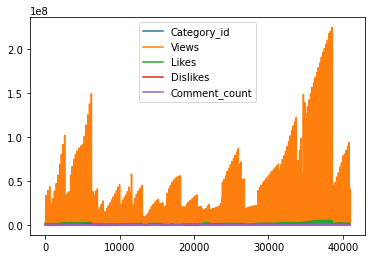

In [ ]:
df.plot()

In [ ]:
views = df['Views']
likes = df['Likes']
dislikes = df['Dislikes']
comment_count = df['Comment_count']

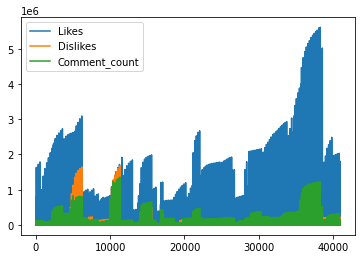

In [ ]:
df[["Likes","Dislikes","Comment_count"]].plot()

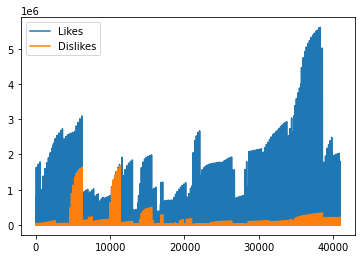

In [ ]:
df[["Likes","Dislikes"]].plot()

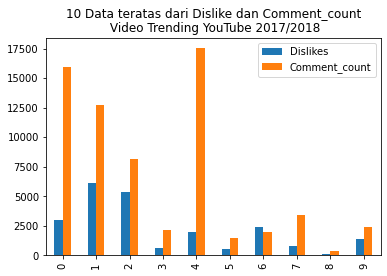

In [ ]:
df[["Dislikes", 'Comment_count']].head(10).plot.bar(title="10 Data teratas dari Dislike dan Comment_count\n Video Trending YouTube 2017/2018")

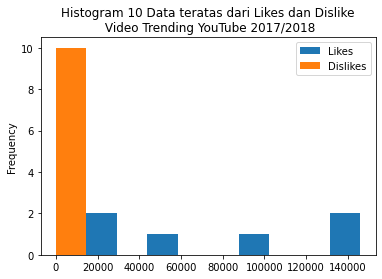

In [ ]:
df[["Likes","Dislikes"]].head(10).plot.hist(title="Histogram 10 Data teratas dari Likes dan Dislike\n Video Trending YouTube 2017/2018")

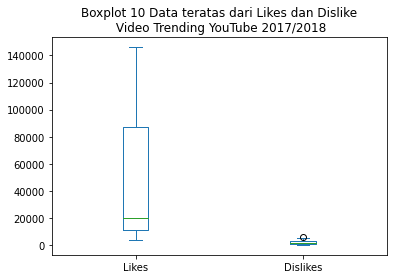

In [ ]:
df[["Likes","Dislikes"]].head(10).plot.box(title="Boxplot 10 Data teratas dari Likes dan Dislike\n Video Trending YouTube 2017/2018")

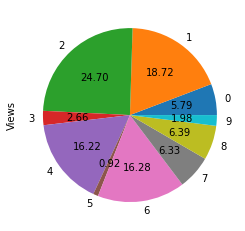

In [ ]:
df["Views"].head(10).plot.pie(autopct='%.2f')

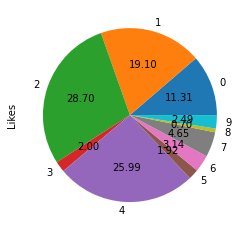

In [ ]:
df["Likes"].head(10).plot.pie(autopct='%.2f')

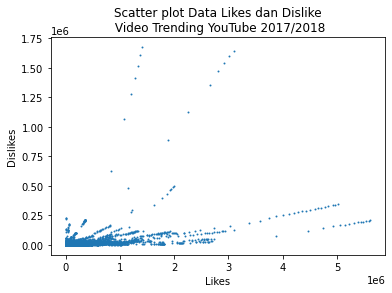

In [ ]:
df.plot(kind='scatter', x = 'Likes', y='Dislikes', title = 'Scatter plot Data Likes dan Dislike\n Video Trending YouTube 2017/2018', s = 0.9)

**Membersihkan Data** 

In [ ]:
df[df["Description"].apply(lambda x: pd.isna(x))].head(3) # Membersihkan data description

,Video_id,Trending_date,Title,Channel_title,Category_id,Publish_time,Tags,Views,Likes,Dislikes,Comment_count,Thumbnail_link,Comments_disabled,Ratings_disabled,Video_error_or_removed,Description
42,NZFhMSgbKKM,17.14.11,Dennis Smith Jr. and LeBron James go back and ...,Ben Rohrbach,17,2017-11-13T15:11:00.000Z,[none],945,7,5,8,https://i.ytimg.com/vi/NZFhMSgbKKM/default.jpg,False,False,False,NaN
47,sbcbvuitiTc,17.14.11,Stephon Marbury and Jimmer Fredette fight in C...,NBA Highlights · YouTube,17,2017-11-10T18:23:05.000Z,"NBA|""Basketball""|""Sports""",956169,2017,2425,1447,https://i.ytimg.com/vi/sbcbvuitiTc/default.jpg,False,False,False,NaN
175,4d07RXYLsJE,17.14.11,Sphaera - demonstrating interaction,Jenny Hanell,28,2017-11-04T20:48:16.000Z,[none],1827,3,0,2,https://i.ytimg.com/vi/4d07RXYLsJE/default.jpg,False,False,False,NaN


In [ ]:
df["Description"] = df["Description"].fillna(value="")

**Dataset Per-Tahun**

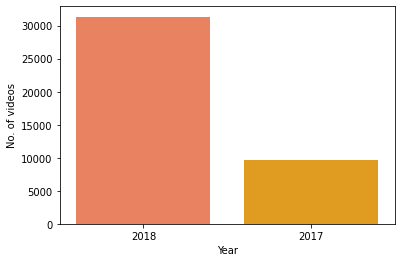

In [ ]:
cdf = df["Trending_date"].apply(lambda x: '20' + x[:2]).value_counts() \
            .to_frame().reset_index() \
            .rename(columns={"index": "year", "Trending_date": "No_of_videos"})

fig, ax = plt.subplots()
_ = sns.barplot(x="year", y="No_of_videos", data=cdf, 
                palette=sns.color_palette(['#ff764a', '#ffa600'], n_colors=7), ax=ax)
_ = ax.set(xlabel="Year", ylabel="No. of videos")

In [ ]:
df["Trending_date"].apply(lambda x: '20' + x[:2]).value_counts(normalize=True)

2018    0.765562
2017    0.234438
Name: Trending_date, dtype: float64

Dapat disimpulkan bawah trending video lebih banyak pada tahun 2018 yaitu dengan nilai 76.55% sedangkan pada tahun 2017 hanya 23.44 %

**Describtion of numerical columns**

In [ ]:
df.describe()

,Category_id,Views,Likes,Dislikes,Comment_count
count,40949.000000,4.094900e+04,4.094900e+04,4.094900e+04,4.094900e+04
mean,19.972429,2.360785e+06,7.426670e+04,3.711401e+03,8.446804e+03
std,7.568327,7.394114e+06,2.288853e+05,2.902971e+04,3.743049e+04
min,1.000000,5.490000e+02,0.000000e+00,0.000000e+00,0.000000e+00
25%,17.000000,2.423290e+05,5.424000e+03,2.020000e+02,6.140000e+02
50%,24.000000,6.818610e+05,1.809100e+04,6.310000e+02,1.856000e+03
75%,25.000000,1.823157e+06,5.541700e+04,1.938000e+03,5.755000e+03
max,43.000000,2.252119e+08,5.613827e+06,1.674420e+06,1.361580e+06


Jumlah rata-rata penayangan video yang sedang tren adalah 2.360.784. Nilai median untuk jumlah penayangan adalah 681.861, yang berarti separuh dari video yang sedang tren memiliki penayangan yang kurang dari jumlah tersebut, dan separuh lainnya memiliki penayangan yang lebih besar dari jumlah tersebut.
Rata-rata jumlah suka video yang sedang tren adalah 74.266, sedangkan jumlah rata-rata tidak suka adalah 3.711. Itu
Jumlah komentar rata-rata adalah 8.446 sedangkan median adalah 1.856.

**Views histogram**

In [ ]:
PLOT_COLORS = ["#268bd2", "#0052CC", "#FF5722", "#b58900", "#003f5c"]
pd.options.display.float_format = '{:.2f}'.format
sns.set(style="ticks")
plt.rc('figure', figsize=(8, 5), dpi=100)
plt.rc('axes', labelpad=20, facecolor="#ffffff", linewidth=0.4, grid=True, labelsize=14)
plt.rc('patch', linewidth=0)
plt.rc('xtick.major', width=0.2)
plt.rc('ytick.major', width=0.2)
plt.rc('grid', color='#9E9E9E', linewidth=0.4)
plt.rc('font', family='Arial', weight='400', size=10)
plt.rc('text', color='#282828')
plt.rc('savefig', pad_inches=0.3, dpi=300)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


(array([0.0e+00, 1.0e+07, 2.0e+07, 3.0e+07, 4.0e+07, 5.0e+07, 6.0e+07,
        7.0e+07, 8.0e+07, 9.0e+07, 1.0e+08, 1.1e+08, 1.2e+08, 1.3e+08,
        1.4e+08, 1.5e+08, 1.6e+08, 1.7e+08, 1.8e+08, 1.9e+08, 2.0e+08,
        2.1e+08, 2.2e+08, 2.3e+08]),
 <a list of 24 Text major ticklabel objects>)

findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.


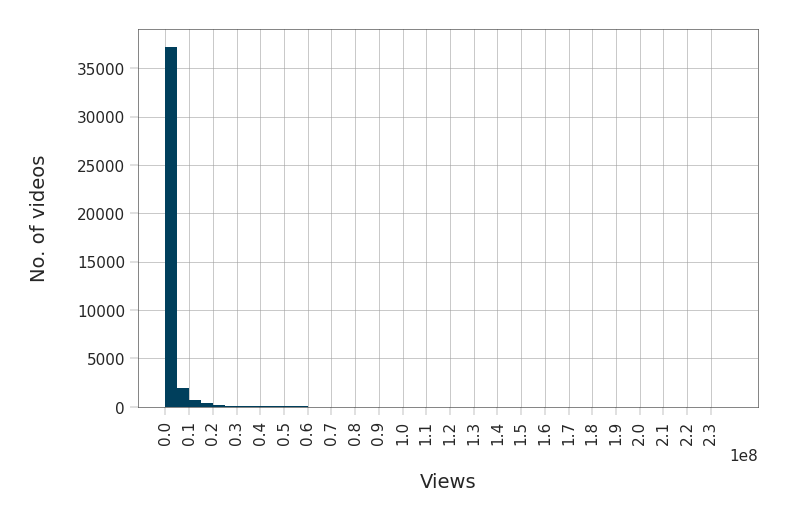

In [ ]:
fig, ax = plt.subplots()
sns.distplot(df["Views"], kde=False, color=PLOT_COLORS[4], 
                 hist_kws={'alpha': 1}, bins=np.linspace(0, 2.3e8, 47), ax=ax)
ax.set(xlabel="Views", ylabel="No. of videos", xticks=np.arange(0, 2.4e8, 1e7))
ax.set_xlim(right=2.5e8)
plt.xticks(rotation=90)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


[Text(0, 0.5, 'No. of videos'), Text(0.5, 0, 'Views')]

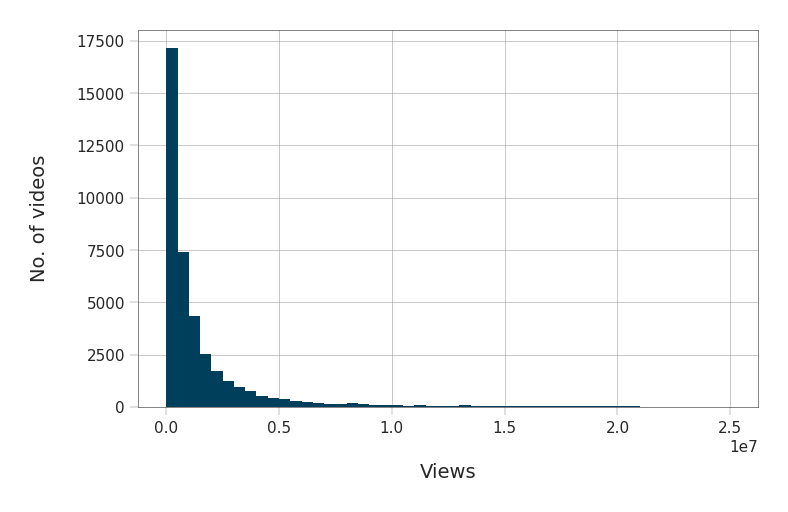

In [ ]:
fig, ax = plt.subplots()
sns.distplot(df[df["Views"] < 25e6]["Views"], kde=False, 
                 color=PLOT_COLORS[4], hist_kws={'alpha': 1}, ax=ax)
ax.set(xlabel="Views", ylabel="No. of videos")

In [ ]:
df[df['Views'] < 1e6]['Views'].count() / df['Views'].count() * 100

60.09426359618062

Jadi, sekitar 60%. Demikian pula, kita dapat melihat bahwa persentase video dengan kurang dari 1,5 juta penayangan adalah sekitar 71%, dan bahwa persentase video dengan kurang dari 5 juta penayangan adalah sekitar 91%.

**Likes histogram**

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


(array([-1000000.,        0.,  1000000.,  2000000.,  3000000.,  4000000.,
         5000000.,  6000000.,  7000000.]),
 <a list of 9 Text major ticklabel objects>)

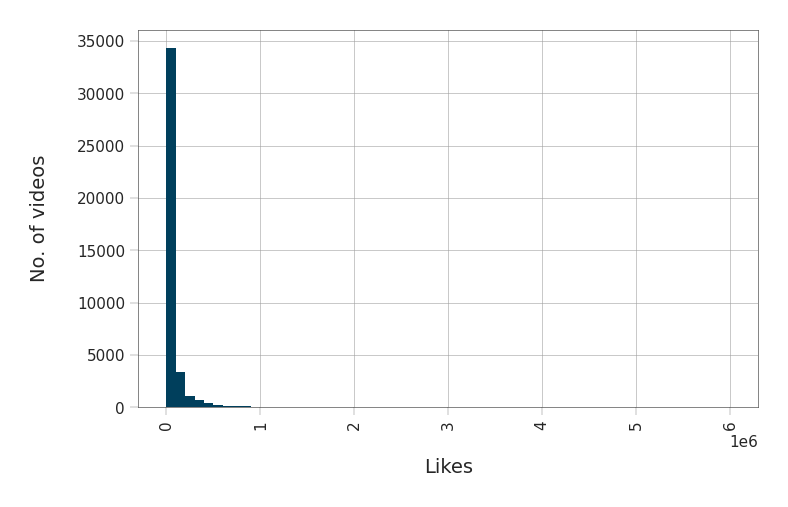

In [ ]:
plt.rc('figure.subplot', wspace=0.9)
fig, ax = plt.subplots()
sns.distplot(df["Likes"], kde=False, 
                 color=PLOT_COLORS[4], hist_kws={'alpha': 1}, 
                 bins=np.linspace(0, 6e6, 61), ax=ax)
ax.set(xlabel="Likes", ylabel="No. of videos")
plt.xticks(rotation=90)

Sebagian besar video yang sedang tren memiliki antara 0 dan 100.000 suka.

In [ ]:
df[df['Likes'] < 4e4]['Likes'].count() / df['Likes'].count() * 100

68.4900730176561

Arftinya bahwa persentase video dengan kurang dari 100.000 suka adalah sekitar 84%.

**Channels yang videonya paling banyak trending di youtube**

[Text(0, 0.5, 'Channel'), Text(0.5, 0, 'No. of videos')]

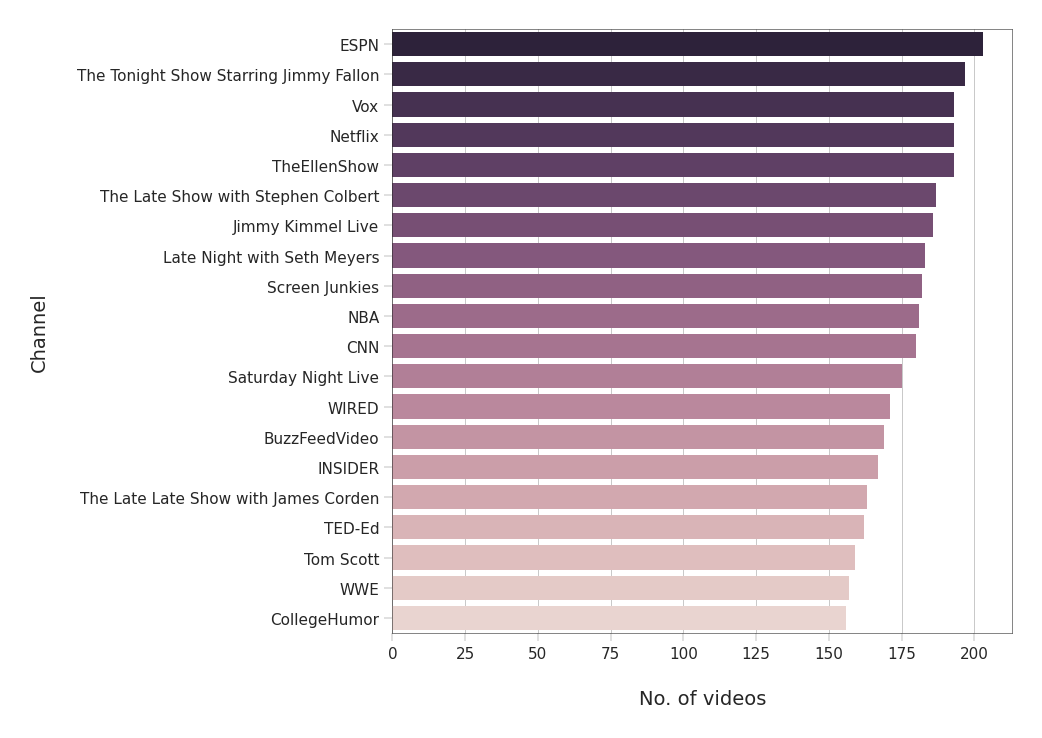

In [ ]:
cdf = df.groupby("Channel_title").size().reset_index(name="Video_count") \
    .sort_values("Video_count", ascending=False).head(20)

fig, ax = plt.subplots(figsize=(8,8))
sns.barplot(x="Video_count", y="Channel_title", data=cdf,
                palette=sns.cubehelix_palette(n_colors=20, reverse=True), ax=ax)
ax.set(xlabel="No. of videos", ylabel="Channel")

**Trending Video yang komentarnya di non aktifkan**

Text(0.5, 1.0, 'Comments Disabled?')

findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.


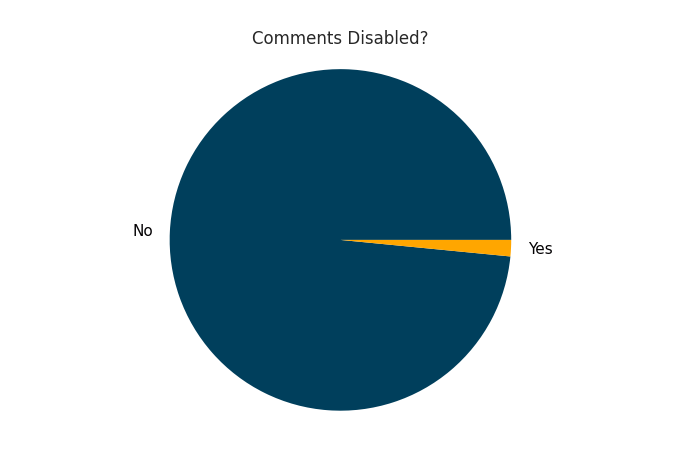

In [ ]:
value_counts = df["Comments_disabled"].value_counts().to_dict()
fig, ax = plt.subplots()
ax.pie(x=[value_counts[False], value_counts[True]], labels=['No', 'Yes'], 
           colors=['#003f5c', '#ffa600'], textprops={'color': '#040204'})
ax.axis('equal')
ax.set_title('Comments Disabled?')

In [ ]:
df["Comments_disabled"].value_counts(normalize=True)

False   0.98
True    0.02
Name: Comments_disabled, dtype: float64

Hanya 2% dari video trending yang menonaktifkan pengguna untuk berkomentar.

# **Data Processing**

**Video yang memiliki likes = 0 dan views maksimumnya**

In [ ]:
df3 = df.query('likes == 0')

In [ ]:
df3[ ['Views','Likes','Dislikes'] ].describe()

,views,likes,dislikes
count,1.720000e+02,172.0,172.000000
mean,4.052518e+06,0.0,0.029070
std,1.135538e+07,0.0,0.274178
min,1.456000e+03,0.0,0.000000
25%,7.713425e+04,0.0,0.000000
50%,4.290240e+05,0.0,0.000000
75%,1.012722e+06,0.0,0.000000
max,5.611196e+07,0.0,3.000000


In [ ]:
df3.sort_values('Views',ascending=False)

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
18150,BhIEIO0vaBE,18.14.02,To Our Daughter,Kylie Jenner,22,2018-02-04T20:27:38.000Z,"Kylie Jenner|""Kylie""|""Travis Scott""|""Baby""|""An...",56111957,0,0,0,https://i.ytimg.com/vi/BhIEIO0vaBE/default.jpg,True,True,False,Directed by Tyler Ross @wttyler\nMusic by Jaco...
17916,BhIEIO0vaBE,18.13.02,To Our Daughter,Kylie Jenner,22,2018-02-04T20:27:38.000Z,"Kylie Jenner|""Kylie""|""Travis Scott""|""Baby""|""An...",55063465,0,0,0,https://i.ytimg.com/vi/BhIEIO0vaBE/default.jpg,True,True,False,Directed by Tyler Ross @wttyler\nMusic by Jaco...
17716,BhIEIO0vaBE,18.12.02,To Our Daughter,Kylie Jenner,22,2018-02-04T20:27:38.000Z,"Kylie Jenner|""Kylie""|""Travis Scott""|""Baby""|""An...",54454945,0,0,0,https://i.ytimg.com/vi/BhIEIO0vaBE/default.jpg,True,True,False,Directed by Tyler Ross @wttyler\nMusic by Jaco...
17496,BhIEIO0vaBE,18.11.02,To Our Daughter,Kylie Jenner,22,2018-02-04T20:27:38.000Z,"Kylie Jenner|""Kylie""|""Travis Scott""|""Baby""|""An...",53183123,0,0,0,https://i.ytimg.com/vi/BhIEIO0vaBE/default.jpg,True,True,False,Directed by Tyler Ross @wttyler\nMusic by Jaco...
17286,BhIEIO0vaBE,18.10.02,To Our Daughter,Kylie Jenner,22,2018-02-04T20:27:38.000Z,"Kylie Jenner|""Kylie""|""Travis Scott""|""Baby""|""An...",51243149,0,0,0,https://i.ytimg.com/vi/BhIEIO0vaBE/default.jpg,True,True,False,Directed by Tyler Ross @wttyler\nMusic by Jaco...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,aLSG3178eD4,17.03.12,Tell Hollywood to stand with immigrants,Define American,29,2017-11-28T13:00:35.000Z,"DACA|""black panther""",2093,0,0,0,https://i.ytimg.com/vi/aLSG3178eD4/default.jpg,True,True,False,"Undocumented in Hollywood? Yes, and we are #He..."
12492,VoUEz9yQJ8w,18.17.01,RAPID EYE MOVEMENT⎪Teaser Trailer,Tentmaker Pictures,1,2018-01-16T14:12:35.000Z,"Francois Arnaud|""Peter Bishai""|""sleep deprivat...",2068,0,0,1,https://i.ytimg.com/vi/VoUEz9yQJ8w/default.jpg,False,True,False,"From Director Peter Bishai (Colors of Heaven),..."
3776,aLSG3178eD4,17.02.12,Tell Hollywood to stand with immigrants,Define American,29,2017-11-28T13:00:35.000Z,"DACA|""black panther""",2005,0,0,0,https://i.ytimg.com/vi/aLSG3178eD4/default.jpg,True,True,False,"Undocumented in Hollywood? Yes, and we are #He..."
3543,aLSG3178eD4,17.01.12,Tell Hollywood to stand with immigrants,Define American,29,2017-11-28T13:00:35.000Z,"DACA|""black panther""",1873,0,0,0,https://i.ytimg.com/vi/aLSG3178eD4/default.jpg,True,True,False,"Undocumented in Hollywood? Yes, and we are #He..."


In [ ]:
df3.iloc[0]

video_id                                                        wRGldR_SQAA
trending_date                                                      17.14.11
title                                                    Apple Clips sample
channel_title                                                  Steve Kovach
category_id                                                              22
publish_time                                       2017-11-09T18:01:04.000Z
tags                                                                 [none]
views                                                                  2259
likes                                                                     0
dislikes                                                                  0
comment_count                                                             0
thumbnail_link               https://i.ytimg.com/vi/wRGldR_SQAA/default.jpg
comments_disabled                                                     False
ratings_disa

**Views yang sangat tinggi tetapi likes = 0**

In [ ]:
df.query('Ratings_disabled == True').describe()

,category_id,views,likes,dislikes,comment_count
count,169.000000,1.690000e+02,169.0,169.0,169.000000
mean,18.384615,4.124415e+06,0.0,0.0,412.106509
std,8.812869,1.144330e+07,0.0,0.0,1075.762958
min,1.000000,1.456000e+03,0.0,0.0,0.000000
25%,10.000000,8.583300e+04,0.0,0.0,0.000000
50%,22.000000,4.594910e+05,0.0,0.0,0.000000
75%,24.000000,1.015005e+06,0.0,0.0,179.000000
max,29.000000,5.611196e+07,0.0,0.0,5286.000000


In [ ]:
df.query('Ratings_disabled == False and likes == 0')

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
192,wRGldR_SQAA,17.14.11,Apple Clips sample,Steve Kovach,22,2017-11-09T18:01:04.000Z,[none],2259,0,0,0,https://i.ytimg.com/vi/wRGldR_SQAA/default.jpg,False,False,False,Clips 2.0 lets you use augmented reality and s...
1490,A_mlvG_nRsg,17.21.11,Kelly Oubre Punches John Wall in the Lead duri...,Rob Andretti,17,2017-10-28T11:15:14.000Z,[none],2197,0,2,0,https://i.ytimg.com/vi/A_mlvG_nRsg/default.jpg,False,False,False,I'm BACK! \n\n• Will you be apart of the take ...
1741,A_mlvG_nRsg,17.22.11,Kelly Oubre Punches John Wall in the Lead duri...,Rob Andretti,17,2017-10-28T11:15:14.000Z,[none],2447,0,3,1,https://i.ytimg.com/vi/A_mlvG_nRsg/default.jpg,False,False,False,I'm BACK! \n\n• Will you be apart of the take ...


*   views sangat tinggi tetapi jumlah likes adalah nol dikarenakan pada bagian likes untuk video yang diupload sengaja dinonaktifkan.

**8. Berapa presentase video dengan likes lebih banyak dari dislikes dengan video likes lebih sedikit dari dislikes ?**

In [ ]:
q1 = '(Likes > Dislikes)'
q2 = '(Likes < Dislikes)'
dfq1 = df.query(q1)
dfq1.shape

(40192, 16)

In [ ]:
dfq2 = df.query(q2)
dfq2.shape

(576, 16)

In [ ]:
bandi = lambda L:list(map(lambda x:x/sum(L),L))
re = [ dfq1.shape[0], dfq2.shape[0] ]
print( bandi(re) )

[0.9858712715855573, 0.0141287284144427]


**9.  Bagaimana perbandingan rata rata dan standard deviasi jumlah views antara video dengan likes lebih banyak dari dislikes dengan
video likes lebih sedikit dari dislikes ?**

In [ ]:
r1 = dfq1.loc[:,'Views'].mean()
st1 = dfq1.loc[:,'Views'].std()
r2 = dfq2.loc[:,'Views'].mean()
st2 = dfq2.loc[:,'Views'].std()

In [ ]:
r1

2372885.492311903

In [ ]:
r2

1048069.0711805555

In [ ]:
print(bandi([r1,r2]))

[0.6936325660781124, 0.3063674339218876]


In [ ]:
print(bandi([st1,st2]))

[0.6525291274590552, 0.3474708725409449]


**Perbandingan rata rata dan standard deviasi jumlah comment antara video dengan likes lebih banyak dari dislikes
dengan video likes lebih sedikit dari dislikes**

In [ ]:
r1 = dfq1.loc[:,'Comment_count'].mean()
st1 = dfq1.loc[:,'Comment_count'].std()
r2 = dfq2.loc[:,'Comment_count'].mean()
st2 = dfq2.loc[:,'Comment_count'].std()

In [ ]:
print(bandi([r1,r2]))

[0.348787682929341, 0.6512123170706591]


In [ ]:
print(bandi([st1,st2]))

[0.2269874820781621, 0.773012517921838]


**11. Berapa ratio rata-rata jumlah likes/dislikes untuk video dengan komentar yang dinonaktifkan ?**

In [ ]:
df4 = df.query('Comments_disabled==True')
df4 = df4.assign( ratio = df4['Likes'] / (df4['Likes'] + df4['Dislikes']))
df4

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,ratio
31,CBVGjS_EJok,17.14.11,Amazon Christmas Advert 2017 - Toys & Games,Amazon.co.uk,24,2017-11-06T17:52:50.000Z,"Amazon|""Amazon Christmas""|""Amazon Xmas""|""Chris...",26000,119,69,0,https://i.ytimg.com/vi/CBVGjS_EJok/default.jpg,True,False,False,Shhhh. See how Amazon helps Dad create a magic...,0.632979
103,9oFP-pOMNwE,17.14.11,H&M Holiday 2017 starring Nicki Minaj – offici...,H&M,24,2017-11-09T08:01:40.000Z,"H&M Holiday|""H&M Holiday Collection""|""H&M""|""Fa...",264793,3283,853,0,https://i.ytimg.com/vi/9oFP-pOMNwE/default.jpg,True,False,False,H&M is pleased to announce that the 2017 Holid...,0.793762
290,CBVGjS_EJok,17.15.11,Amazon Christmas Advert 2017 - Toys & Games,Amazon.co.uk,24,2017-11-06T17:52:50.000Z,"Amazon|""Amazon Christmas""|""Amazon Xmas""|""Chris...",94229,217,177,0,https://i.ytimg.com/vi/CBVGjS_EJok/default.jpg,True,False,False,Shhhh. See how Amazon helps Dad create a magic...,0.550761
372,9oFP-pOMNwE,17.15.11,H&M Holiday 2017 starring Nicki Minaj – offici...,H&M,24,2017-11-09T08:01:40.000Z,"H&M Holiday|""H&M Holiday Collection""|""H&M""|""Fa...",271685,3330,854,0,https://i.ytimg.com/vi/9oFP-pOMNwE/default.jpg,True,False,False,H&M is pleased to announce that the 2017 Holid...,0.795889
483,Hq89wYzOjfs,17.16.11,Amazon CEO Jeff Bezos and brother Mark give a ...,Summit,27,2017-11-14T17:37:20.000Z,"summit|""conference""|""ideas""|""talks""|""performan...",11769,127,13,0,https://i.ytimg.com/vi/Hq89wYzOjfs/default.jpg,True,False,False,"In this first-of-its-kind conversation, the Be...",0.907143
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40549,FchkqXEg0qs,18.13.06,Nintendo @ E3 2018: Day 1,Nintendo,20,2018-06-13T01:18:57.000Z,"nintendo|""play""|""play nintendo""|""game""|""gamepl...",3238183,61841,3708,0,https://i.ytimg.com/vi/FchkqXEg0qs/default.jpg,True,False,False,ESRB Rating: RATING PENDING to Teen. Rating Pe...,0.943432
40624,J2m7EUwnqGg,18.13.06,iPhone X — Animoji: Taxi Driver — Apple,Apple,28,2018-06-04T04:00:00.000Z,"Apple|""iphone""|""iphone x""|""animoji""|""apple ani...",8903674,79182,31697,0,https://i.ytimg.com/vi/J2m7EUwnqGg/default.jpg,True,False,False,Animoji on iPhone X (feat. HYUKOH) Learn more ...,0.714130
40631,lBbSzQXQknw,18.13.06,And the WINNER of Britain’s Got Talent 2018 is...,Britain's Got Talent,24,2018-06-03T21:11:48.000Z,"britain's got talent|""britains got talent""|""br...",4642895,53192,4312,0,https://i.ytimg.com/vi/lBbSzQXQknw/default.jpg,True,False,False,What an amazing show our acts put on tonight f...,0.925014
40832,J2m7EUwnqGg,18.14.06,iPhone X — Animoji: Taxi Driver — Apple,Apple,28,2018-06-04T04:00:00.000Z,"Apple|""iphone""|""iphone x""|""animoji""|""apple ani...",8916546,79282,31716,0,https://i.ytimg.com/vi/J2m7EUwnqGg/default.jpg,True,False,False,Animoji on iPhone X (feat. HYUKOH) Learn more ...,0.714265


In [ ]:
r1 = df4['ratio'].mean()
r1

0.8324019250989896

In [ ]:
print(r1,1-r1,sep=':')

0.8324019250989896:0.16759807490101042


**Ratio rata-rata jumlah comments/views untuk video dengan ratings yang dinonaktifkan**

In [ ]:
df5 = df.query('Ratings_disabled==True')
df5 = df5.assign( ratio = df5['Comment_count'] / (df5['Views'] + df5['Comment_count']) )
r1 = df5['ratio'].mean()
print(r1, 1-r1)

0.0018133621624128007 0.9981866378375872


**Rata-rata jumlah views untuk video yang tidak memiliki tags**

In [ ]:
df.query('tags=="[none]"')['Views'].mean()

1494136.3687296417

**Menentukan jumlah perbandingan rata-rata viewers yang tidak melakukan rating like/dislike dengan yang meninggalkan ratings like/dislike**

In [ ]:
df['Views']

0          748374
1         2418783
2         3191434
3          343168
4         2095731
           ...   
40944     1685609
40945     1064798
40946     1066451
40947     5660813
40948    10306119
Name: views, Length: 40949, dtype: int64

In [ ]:
df['Likes'] + df['Dislikes']

0         60493
1        103331
2        151372
3         10838
4        134224
          ...  
40944     39545
40945     60390
40946     49100
40947    195803
40948    570055
Length: 40949, dtype: int64

In [ ]:
df['Views'] - ( df['Likes'] + df['Dislikes'] )

0         687881
1        2315452
2        3040062
3         332330
4        1961507
          ...   
40944    1646064
40945    1004408
40946    1017351
40947    5465010
40948    9736064
Length: 40949, dtype: int64

In [ ]:
r1 = ( (df['Views'] - ( df['Likes'] + df['Dislikes'] ) ) / df['Views'] ).mean()
print(r1, 1-r1)

0.9639728697489426 0.036027130251057415


**Import Libraries**

In [ ]:
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [ ]:
df5 = df[['Views','Likes',	'Dislikes',	'Comments_disabled']]
df5

,Views,Likes,Dislikes,Comments_disabled
0,748374,57527,2966,False
1,2418783,97185,6146,False
2,3191434,146033,5339,False
3,343168,10172,666,False
4,2095731,132235,1989,False
...,...,...,...,...
40944,1685609,38160,1385,False
40945,1064798,60008,382,False
40946,1066451,48068,1032,False
40947,5660813,192957,2846,False


In [ ]:
df5.isnull().values.any().sum()
df6=df5.replace({'Comments_disabled':{'False':1, 'True':0}})
df6.head(4)

,Views,Likes,Dislikes,Comments_disabled
0,748374,57527,2966,False
1,2418783,97185,6146,False
2,3191434,146033,5339,False
3,343168,10172,666,False


*Atur variabel independen (direpresentasikan sebagai X) dan variabel dependen (direpresentasikan sebagai y):*

In [ ]:
X = df[['Views','Likes',	'Dislikes']]
y = df['Comments_disabled']

*Terapkan train_test_split. Misalnya, Anda dapat mengatur ukuran tes ke 0,25, dan karena itu pengujian model akan didasarkan pada 25% dari dataset, sedangkan pelatihan model akan didasarkan pada 75% dari dataset:*

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

# **Model Implementation**

**Metode Regresi Logistik**

**Terapkan regresi logistik sebagai berikut:**

In [ ]:
logistic_regression = LogisticRegression(solver='liblinear')
logistic_regression.fit(X_train, y_train)
y_pred = logistic_regression.predict(X_test)

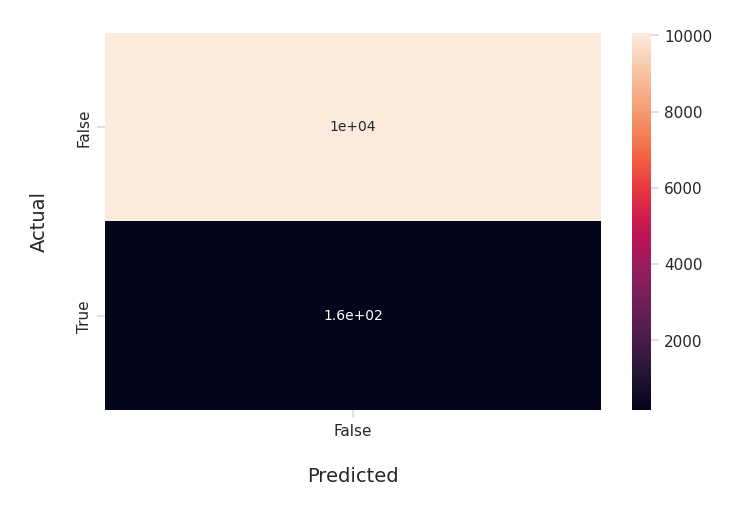

In [ ]:
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True)

*Untuk bagian terakhir, cetak Akurasi dan plot Confusion Matrix:*

In [ ]:
print (X_test) 
print (y_pred)

          Views   Likes  Dislikes
8319    1675844   40908      1163
8679   21344664  690283    137707
30645   1138884   60849       926
777         704      10         2
5386       9947      14         1
...         ...     ...       ...
15362    155341    1263        99
37115   3644362  114540      6980
578       46260    2286        35
3427     364537   21807       402
1511    1928537  120993      1142

[10238 rows x 3 columns]
[False False False ... False False False]


In [ ]:
print('Akurasi: ', metrics.accuracy_score(y_test, y_pred))
plt.show()

Akurasi:  0.9842742723188123


In [ ]:
model=LogisticRegression()
model.fit(X_train,y_train)
predictions=model.predict(X_test)

In [ ]:
print(classification_report(y_test,predictions))
print(accuracy_score(y_test,predictions))

              precision    recall  f1-score   support

       False       0.98      1.00      0.99     10077
        True       0.00      0.00      0.00       161

    accuracy                           0.98     10238
   macro avg       0.49      0.50      0.50     10238
weighted avg       0.97      0.98      0.98     10238

0.9842742723188123


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# **Insight yang Didapat**

Insight yang didapat dari data tentang video trending YouTube selama 205 hari adalah :
*  Dataset dikumpulkan pada tahun 2017 dan 2018. Ini berisi 40949 entri video. 71% video trending memiliki kurang dari 1,5 juta tampilan, dan 91% memiliki kurang dari 5 juta tampilan. 
* 68% video trending memiliki kurang dari 40.000 suka, dan 84% memiliki kurang dari 100.000 suka. 
* 67% video trending memiliki kurang dari 4.000 komentar, dan 93% memiliki kurang dari 25.000 komentar. 
* Dataset berisi 40494 entri tetapi tidak untuk 40494 video unik tetapi untuk 6351 video unik. 
* Ada korelasi positif antara jumlah suka dan jumlah komentar, dan sedikit lebih lemah antara jumlah tidak suka dan jumlah komentar. 
* Kategori yang memiliki trending video terbanyak adalah 'Entertainment' dengan 9.964 video, disusul kategori 'Music' dengan 6.472 video, disusul kategori 'Howto & Style' dengan 4.146 video. 
* Sebaliknya, kategori yang memiliki trending video paling sedikit adalah 'Shows' dengan 57 video, diikuti oleh 'Nonprofits & Activisim' dengan 57 video, diikuti oleh 'Autos & Vehicles' dengan 384 video.

* Ditemukan video yang memiliki likes = tapi masih memiliki views yang cukup tinggi. hal tersebut dikarenakan pada bagian likes, dislike, dan komentar untuk video yang diupload sengaja dinonaktifkan.
* Presentase video dengan likes lebih banyak dari dislikes dengan video likes lebih sedikit dari dislikes adalah 0.9858712715855573 : 0.0141287284144427
* Perbandingan rata rata dan standard deviasi jumlah views antara video dengan likes lebih banyak dari dislikes dengan video likes lebih sedikit dari dislikes adalah 0.6525291274590552 : 0.3474708725409449
* Perbandingan rata rata dan standard deviasi jumlah comment antara video den- gan likes lebih banyak dari dislikes dengan video likes lebih sedikit dari dislikes adalah 0.2269874820781621 : 0.773012517921838
* Ratio rata-rata jumlah likes/dislikes untuk video dengan komentar yang dinonaktifkan adalah 0.8324019250989896 : 0.16759807490101042
* Ratio rata-rata jumlah comments/views untuk video dengan ratings yang dinonaktifkan adalah 0.0018133621624128007 : 0.9981866378375872
* Rata-rata jumlah views untuk video yang tidak memiliki tags adalah 1494136.3687296417
* jumlah perbandingan rata-rata viewers yang tidak melakukan rating like/dislike dengan yang meninggalkan ratings like/dislike adalah 0.9639728697489426 : 0.036027130251057415